## Human Activity Recognition Using Accelerometer Data

Dataset Link: http://www.cis.fordham.edu/wisdm/dataset.php

The WISDM dataset contains six different labels (Downstairs, Jogging, Sitting, Standing, Upstairs, Walking). 

In [347]:
import sys
sys.path[-1] = "/usr/local/lib/python3.9/site-packages"
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.0


In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [349]:
num_activities = 7

In [350]:
import pandas as pd
import glob

# Used to train
train_path = '/Users/dcheung/CMU/18743_Neuromorphic_CompArch/18-743_Project/data'
source_files = glob.glob(train_path + '/*.csv')

dataframes = []
num = 1
for file in source_files:
    df = pd.read_csv(file) # additional arguments up to your needs
    df['user'] = num
    df['time'] = range(0, len(df))
    df = df.rename(columns={'label': 'activity'})
    num = num + 1
    df = df[df.activity != 0]
    dataframes.append(df)

df_all = pd.concat(dataframes, axis=0)
df_all = df_all[['user', 'activity', 'time', 'x', 'y', 'z']]
data = df_all
df_all

,user,activity,time,x,y,z
0,1,1.0,0,2057,2043,1665
1,1,1.0,1,2045,2039,1666
2,1,1.0,2,2042,2036,1662
3,1,1.0,3,2045,2042,1660
4,1,1.0,4,2043,2037,1660
...,...,...,...,...,...,...
99994,15,7.0,99994,1779,2323,1963
99995,15,7.0,99995,1774,2321,1972
99996,15,7.0,99996,1771,2320,1978
99997,15,7.0,99997,1756,2321,1977


In [351]:
#predict_path = 'C:/Users/uwu/Documents/CMU/2022 Spring/18743/18-743_Project/03_a.csv'


# Use this to predict based on a csv
predict_path = '/Users/dcheung/CMU/18743_Neuromorphic_CompArch/18-743_Project/data/07.csv'

df_predict = pd.read_csv(predict_path) # additional arguments up to your needs
df_predict['user'] = 16
df_predict['time'] = range(0, len(df_predict))
df_predict = df_predict.rename(columns={'label': 'activity'})
df_predict = df_predict[df_predict.activity != 0]
df_predict = df_predict[['user', 'activity', 'time', 'x', 'y', 'z']]
df_predict

# predict_path = '/Users/dcheung/CMU/18743_Neuromorphic_CompArch/18-743_Project/data/07.csv'

# df_predict = pd.read_csv(predict_path) # additional arguments up to your needs
# df_predict['user'] = 16
# df_predict['time'] = range(0, len(df_predict))
# df_predict = df_predict.rename(columns={'label': 'activity'})
# df_predict = df_predict[df_predict.activity != 0]
# df_predict = df_predict[['user', 'activity', 'time', 'x', 'y', 'z']]
# df_predict

# predict_path = '/Users/dcheung/CMU/18743_Neuromorphic_CompArch/18-743_Project/data/08.csv'

# df_predict = pd.read_csv(predict_path) # additional arguments up to your needs
# df_predict['user'] = 16
# df_predict['time'] = range(0, len(df_predict))
# df_predict = df_predict.rename(columns={'label': 'activity'})
# df_predict = df_predict[df_predict.activity != 0]
# df_predict = df_predict[['user', 'activity', 'time', 'x', 'y', 'z']]
# df_predict

# predict_path = '/Users/dcheung/CMU/18743_Neuromorphic_CompArch/18-743_Project/data/09.csv'

# df_predict = pd.read_csv(predict_path) # additional arguments up to your needs
# df_predict['user'] = 16
# df_predict['time'] = range(0, len(df_predict))
# df_predict = df_predict.rename(columns={'label': 'activity'})
# df_predict = df_predict[df_predict.activity != 0]
# df_predict = df_predict[['user', 'activity', 'time', 'x', 'y', 'z']]
# df_predict


,user,activity,time,x,y,z
0,16,1,0,1892,2279,1781
1,16,1,1,1895,2283,1785
2,16,1,2,1889,2279,1794
3,16,1,3,1892,2276,1794
4,16,1,4,1892,2280,1787
...,...,...,...,...,...,...
99994,16,7,99994,2024,2365,1937
99995,16,7,99995,2031,2359,1952
99996,16,7,99996,2023,2355,1957
99997,16,7,99997,2025,2368,1955


#### Load the Dataset 

In [352]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [353]:
data.shape

(1668579, 6)

In [354]:
df_predict.shape

(99999, 6)

### Balance this data 

In [355]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [356]:
df_predict['x'] = df_predict['x'].astype('float')
df_predict['y'] = df_predict['y'].astype('float')
df_predict['z'] = df_predict['z'].astype('float')

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1668579 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1668579 non-null  int64  
 1   activity  1667982 non-null  float64
 2   time      1668579 non-null  int64  
 3   x         1668579 non-null  float64
 4   y         1668579 non-null  float64
 5   z         1668579 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 89.1 MB


In [358]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user      99999 non-null  int64  
 1   activity  99999 non-null  int64  
 2   time      99999 non-null  int64  
 3   x         99999 non-null  float64
 4   y         99999 non-null  float64
 5   z         99999 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 5.3 MB


In [359]:
Fs = 20

In [360]:
activities = data['activity'].value_counts().index

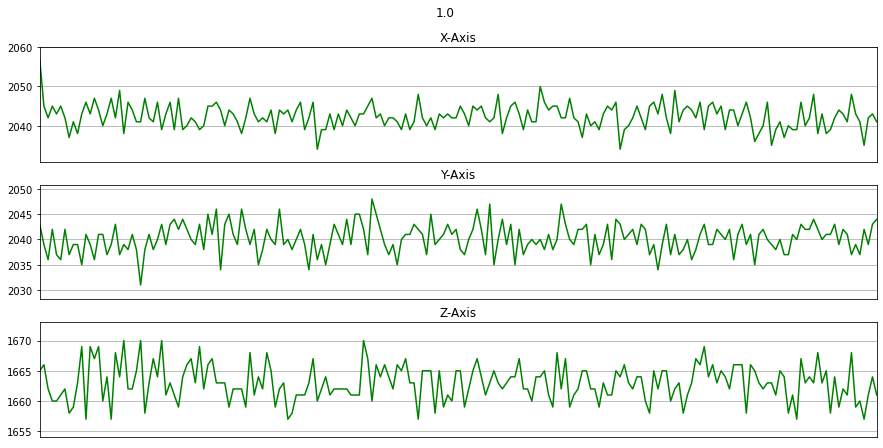

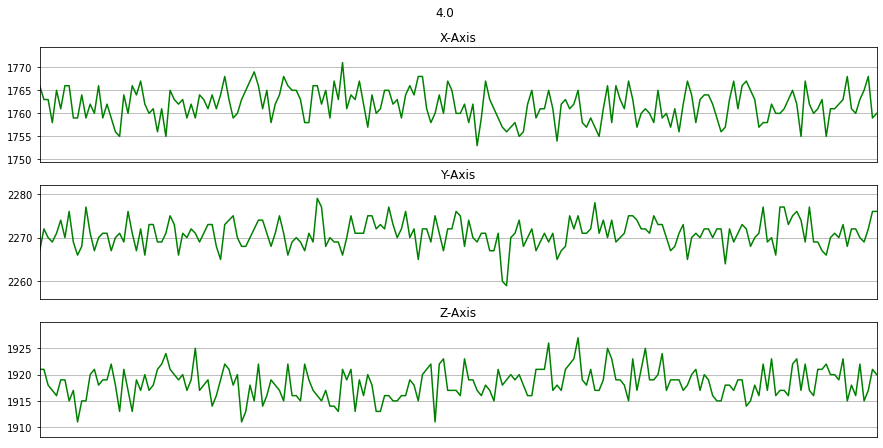

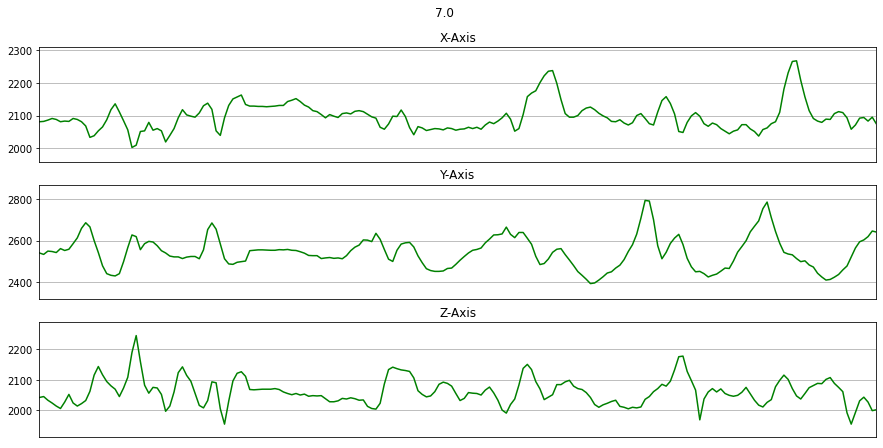

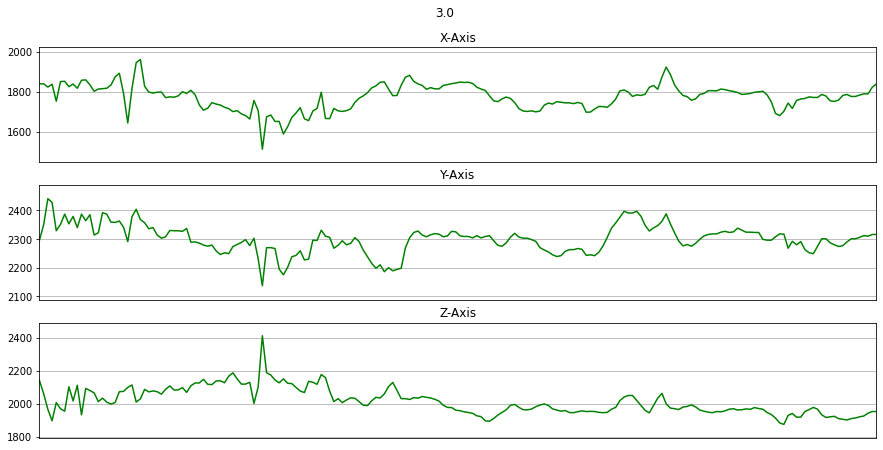

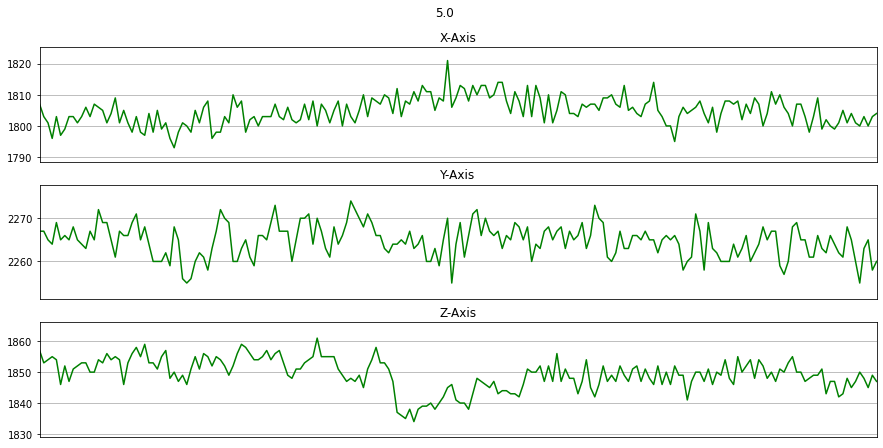

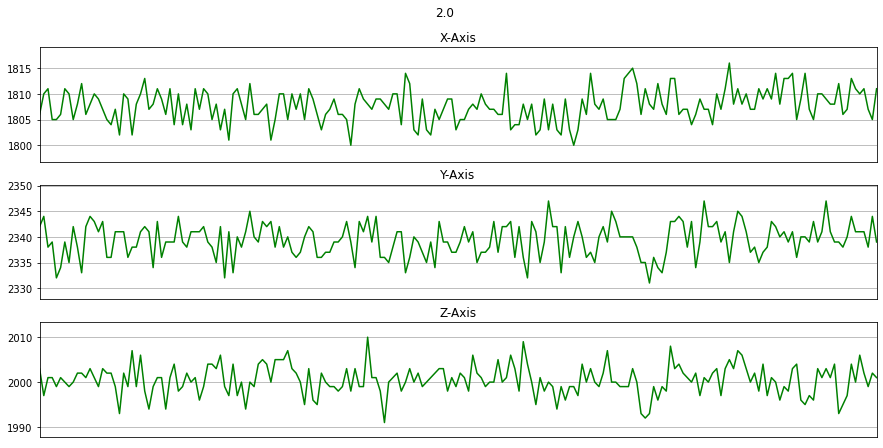

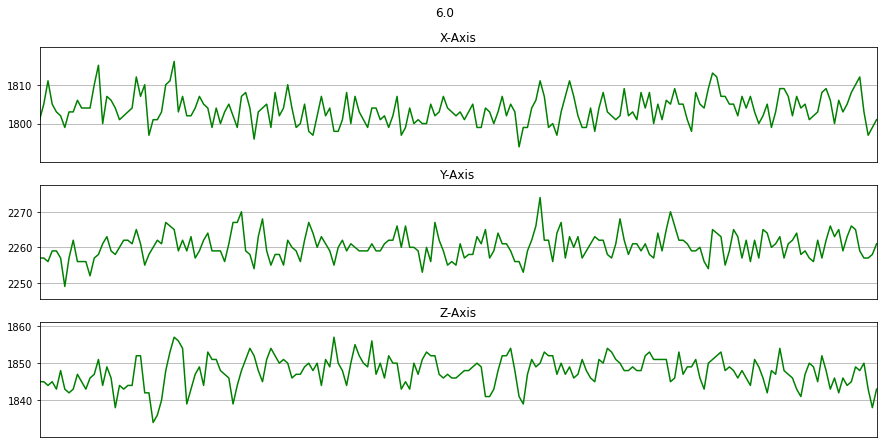

In [361]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [362]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,1.0,2057.0,2043.0,1665.0
1,1.0,2045.0,2039.0,1666.0
2,1.0,2042.0,2036.0,1662.0
3,1.0,2045.0,2042.0,1660.0
4,1.0,2043.0,2037.0,1660.0


In [363]:
df_pre = df_predict.drop(['user', 'time'], axis = 1).copy()
df_pre.head()

,activity,x,y,z
0,1,1892.0,2279.0,1781.0
1,1,1895.0,2283.0,1785.0
2,1,1889.0,2279.0,1794.0
3,1,1892.0,2276.0,1794.0
4,1,1892.0,2280.0,1787.0


In [364]:
balanced_data = pd.DataFrame()

for i in range(1, num_activities+1):
    balanced_data = pd.concat([balanced_data, df[df['activity']==i].head(df['activity'].value_counts().min()).copy()])

print(balanced_data.shape)
print(balanced_data['activity'].value_counts())

(243313, 4)
1.0    34759
2.0    34759
3.0    34759
4.0    34759
5.0    34759
6.0    34759
7.0    34759
Name: activity, dtype: int64


In [365]:
from sklearn.preprocessing import LabelEncoder

In [366]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
0,1.0,2057.0,2043.0,1665.0,0
1,1.0,2045.0,2039.0,1666.0,0
2,1.0,2042.0,2036.0,1662.0,0
3,1.0,2045.0,2042.0,1660.0,0
4,1.0,2043.0,2037.0,1660.0,0


In [367]:
df_pre['label'] = label.fit_transform(df_pre['activity'])
df_pre.head()

,activity,x,y,z,label
0,1,1892.0,2279.0,1781.0,0
1,1,1895.0,2283.0,1785.0,0
2,1,1889.0,2279.0,1794.0,0
3,1,1892.0,2276.0,1794.0,0
4,1,1892.0,2280.0,1787.0,0


In [368]:
label.classes_

array([1, 2, 3, 4, 5, 6, 7])

### Standardized data 

In [369]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']
X.shape

(243313, 3)

In [370]:
X_pred = df_pre[['x', 'y', 'z']]
y_pred = df_pre['label']
X_pred.shape

(99999, 3)

In [371]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.593712,-2.520884,-2.822054,0
1,0.520345,-2.550866,-2.812909,0
2,0.502003,-2.573352,-2.849489,0
3,0.520345,-2.528380,-2.867780,0
4,0.508117,-2.565857,-2.867780,0
...,...,...,...,...
243308,1.150079,-0.137337,-0.307148,6
243309,1.131737,-0.182310,-0.352874,6
243310,1.131737,-0.249769,-0.471760,6
243311,1.143965,-0.272255,-0.499195,6


In [372]:
scaler = StandardScaler()
X_pred = scaler.fit_transform(X_pred)

scaled_X_pred = pd.DataFrame(data = X_pred, columns = ['x', 'y', 'z'])
scaled_X_pred['label'] = y_pred.values

scaled_X_pred

,x,y,z,label
0,-0.046862,-0.045332,-0.045382,0
1,-0.046831,-0.045293,-0.045332,0
2,-0.046893,-0.045332,-0.045220,0
3,-0.046862,-0.045361,-0.045220,0
4,-0.046862,-0.045322,-0.045307,0
...,...,...,...,...
99994,-0.045507,-0.044494,-0.043433,6
99995,-0.045436,-0.044552,-0.043245,6
99996,-0.045518,-0.044591,-0.043183,6
99997,-0.045497,-0.044464,-0.043208,6


### Frame Preparation 

In [373]:
import scipy.stats as stats

In [374]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [375]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [376]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [377]:
X_pred, y_pred = get_frames(scaled_X_pred, frame_size, hop_size)

In [378]:
X.shape, y.shape

((6081, 80, 3), (6081,))

In [379]:
X_pred.shape, y_pred.shape

((2498, 80, 3), (2498,))

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [381]:
X_train.shape, X_test.shape

((4864, 80, 3), (1217, 80, 3))

In [382]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [383]:
X_train = X_train.reshape(4864, 80, 3, 1)
X_test = X_test.reshape(1217, 80, 3, 1)

In [384]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

### 2D CNN Model 

In [385]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))


In [386]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [387]:
history = model.fit(X_train, y_train, epochs = 1, validation_data= (X_test, y_test), verbose=1)

152/152 [==============================] - 2s 8ms/step - loss: 1.5410 - accuracy: 0.3993 - val_loss: 1.3039 - val_accuracy: 0.5111


In [388]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

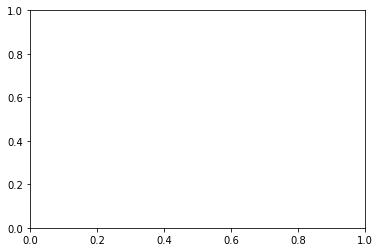

In [389]:
plot_learningCurve(history, 10)

### Confusion Matrix 

In [ ]:
y_p = model.predict(X_test)
y_classes = y_p.argmax(axis=-1)
y_classes

array([6, 0, 6, ..., 1, 3, 0])

In [ ]:
y_predict_1 = model.predict(X_pred)
y_predict_classes  = y_predict_1.argmax(axis=-1)
y_predict_classes

array([0, 0, 0, ..., 4, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix

cf_matrix = confusion_matrix(y_test, y_classes)

num1 = 0

for i in range(len(y_classes)):
    if (y_classes[i] != y_test[i]):
        num1 = num1 + 1
print(1-num1/len(y_classes))

print(cf_matrix)

0.6992604765817585
[[167   3   1   0   2   1   0]
 [ 18 107   1   1  19  24   4]
 [  0   0 108  43   4   1  18]
 [  0   0  22 150   2   0   0]
 [  0  16  28  10  71  35  14]
 [  0  14   6   0  20  87  47]
 [  0   0   8   1   3   0 161]]


In [ ]:
cf_matrix = confusion_matrix(y_pred, y_predict_classes)

num1 = 0

for i in range(len(y_predict_classes)):
    if (y_pred[i] != y_predict_classes[i]):
        num1 = num1 + 1
print(1-num1/len(y_predict_classes))

print(cf_matrix)

0.05575611712795825
[[  35 1048    0    1    5    7    5]
 [   0   74    0    0   10    2    0]
 [   0  415    0    0  150   23    0]
 [   0   60    0    0  368  123    0]
 [   0   62    0    0   30    6    0]
 [   0   68    0    0    1    0    0]
 [   0    0    0    0    0    0    0]]


In [ ]:
model.save_weights('model.h5')